In [25]:
from utils.FeatureCalculator import FeatureCalculator
import numpy as np
import pandas as pd
import os

# display the current working directory
display("Current working directory: {0}".format(os.getcwd()))

'Current working directory: /nethome/yuxiang.wu/CCA-representation-ML/Dataset_Cleaned'

### Feature Calculation for Alloy Components

**Description**:prepares and processes data about alloy compositions, specifically it creates a `FeatureCalculator` object from the defined compositions, then calculates and prints the corresponding alloy features.


In [26]:
# Define a list of component elements and their corresponding fractions
compo_elem = ["Ni", "Cr", "Mo", "Ti", "Fe"]
ele_frac = np.array([43.8, 38.3, 2.44, 1.04, 0])

# Create a dictionary mapping each element to its corresponding fraction,
ele_frac_dict = {elem: frac for elem, frac in zip(
    compo_elem, ele_frac)}

# Prepare data in the format required for FeatureCalculator - a list of tuples,
# where each tuple contains a list of elements and their corresponding fractions
compositions = [(list(ele_frac_dict.keys()), list(ele_frac_dict.values()))]

print(compositions)

# Create a FeatureCalculator object with the prepared compositions
calculator = FeatureCalculator(compositions)

# Calculate the features using the FeatureCalculator object
features = calculator.calculate_features()

print(features)

[(['Ni', 'Cr', 'Mo', 'Ti', 'Fe'], [43.8, 38.3, 2.44, 1.04, 0.0])]
[array([ 1.07257700e+02,  9.14284921e+00,  1.68265280e+05,  1.53842608e+06,
       -5.74967136e+04,  2.54891799e+06, -3.07385957e+02,  1.54108000e+02,
        1.40898674e+03,  6.86600000e+02,  6.27750827e+03,  1.46876000e+13,
        1.34286583e+05])]


### Data Loading, Feature Calculation, and Extraction

Reads various datasets from Excel files, calculates specific features for each material composition in these datasets using a custom `FeatureCalculator` class, extracts relevant data from the corrosion and hardness datasets, and displays the first rows of the extracted data.


In [15]:
import pandas as pd
from utils.FeatureCalculator import FeatureCalculator

# Initialization of the constants and the data to be loaded
feature_names = ["a", "delta_a", "Tm", "sigma_Tm", "Hmix", "sigma_Hmix", "ideal_S",
                 "elec_nega", "sigma_elec_nega", "VEC", "sigma_VEC", "bulk_modulus", "sigma_bulk_modulus"]

# Lists of filenames, elements for each file, and the header rows for the data in each file
data_file_names = ["LiteratureDataset_Corrosion_YW_v3.xlsx",
                   "LiteratureDataset_Hardness_YW_v3.xlsx",
                   "MultiTaskModel_NiCrCoVFe_KW99_at_pct.xlsx",
                   "MultiTaskModel_NiCrCoVFe_KW99_wt_pct.xlsx",
                   "MultiTaskModel_NiCrMoTiFe_KW131_at_pct.xlsx",
                   "MultiTaskModel_NiCrMoTiFe_KW131_wt_pct.xlsx"]
element_columns = [['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                    'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y'],
                   ['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                    'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'],
                   ['Ni', 'Cr', 'Co', 'V', 'Fe'],
                   ['Ni', 'Cr', 'Co', 'V', 'Fe'],
                   ['Ni', 'Cr', 'Mo', 'Ti', 'Fe'],
                   ['Ni', 'Cr', 'Mo', 'Ti', 'Fe']]

df_header_list = [2, 2, 0, 0, 0, 0, 0, 0]
df_compo = pd.DataFrame(columns=['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                                 'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'])
features_dfs = []

# Processing each data file along with the corresponding elements
for i in range(len(data_file_names)):
    # Load and preprocess data from each excel file
    data_df = pd.read_excel(data_file_names[i], header=df_header_list[i])
    # print(data_df.columns)
    element_fractions = data_df[element_columns[i]].fillna(0)

    # Calculate features for each composition
    compositions = [(element_columns[i], element_fraction)
                    for element_fraction in element_fractions.values]
    feature_calculator = FeatureCalculator(compositions)
    calculated_features = feature_calculator.calculate_features()

    # Store the calculated features in a DataFrame
    features_df = pd.DataFrame(calculated_features, columns=feature_names)
    features_dfs.append(features_df)

    # Extract and store specific data and features for the corrosion and hardness datasets
    if i == 0:  # Corrosion dataset
        df_C_compo, df_C_specific_testing, df_C_specific_features, df_C_output = element_fractions, data_df[[
            'TestTemperature_C', 'ChlorideIonConcentration', 'pH', 'ScanRate_mVs']], features_df, data_df[['AvgPittingPotential_mV']]

        # now I want to make df_C_compo have the same columns as df_compo
        df_C_compo = pd.concat([df_C_compo, df_compo],
                               axis=0, ignore_index=True).fillna(0)
        display(df_C_compo.head(1))

    if i == 1:  # Hardness dataset
        df_H_compo, df_H_specific_features, df_H_output = element_fractions, features_df, data_df[[
            'converted HV']]
        df_H_compo = pd.concat([df_H_compo, df_compo],
                               axis=0, ignore_index=True).fillna(0)
        display(df_H_compo.head(1))


# Display the first row of the specific data, features, and output for the corrosion and hardness datasets
display(df_C_compo.head(1), df_C_specific_testing.head(1),
        df_C_specific_features.head(1), df_C_output.head(1))
display(df_H_compo.head(1), df_H_specific_features.head(1), df_H_output.head(1))

,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,19.92,18.54,20.93,0.0,0.0,0,0.0,0.0,0.0,19.59,0.0,0.0,0.0,0.0,0.0,21.02,0,0.0,0.0,0.0


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


,TestTemperature_C,ChlorideIonConcentration,pH,ScanRate_mVs
0,50.0,0.005133,7.8,0.1


,a,delta_a,Tm,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
0,124.30836,9.9,186465.714,1.846011e+06,-29725.004,1.441756e+06,-370.81335,180.5656,1787.599615,779.48,7716.860233,1.678989e+13,166219.942589


,AvgPittingPotential_mV
0,287.0


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,19.92,18.54,20.93,0.0,0.0,0,0.0,0.0,0.0,19.59,0.0,0.0,0.0,0.0,0.0,21.02,0,0.0,0.0,0.0


,a,delta_a,Tm,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
0,126.69848,9.900001,179579.93,1.777843e+06,-42038.7456,2.657898e+06,-299.679129,177.0884,1753.175704,806.21,7981.49141,1.625460e+13,160920.693702


,converted HV
0,140.913294


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus,AvgPittingPotential_mV
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,...,-29725.004,1.441756e+06,-370.81335,180.5656,1787.599615,779.48,7716.860233,1.678989e+13,166219.942589,287.0


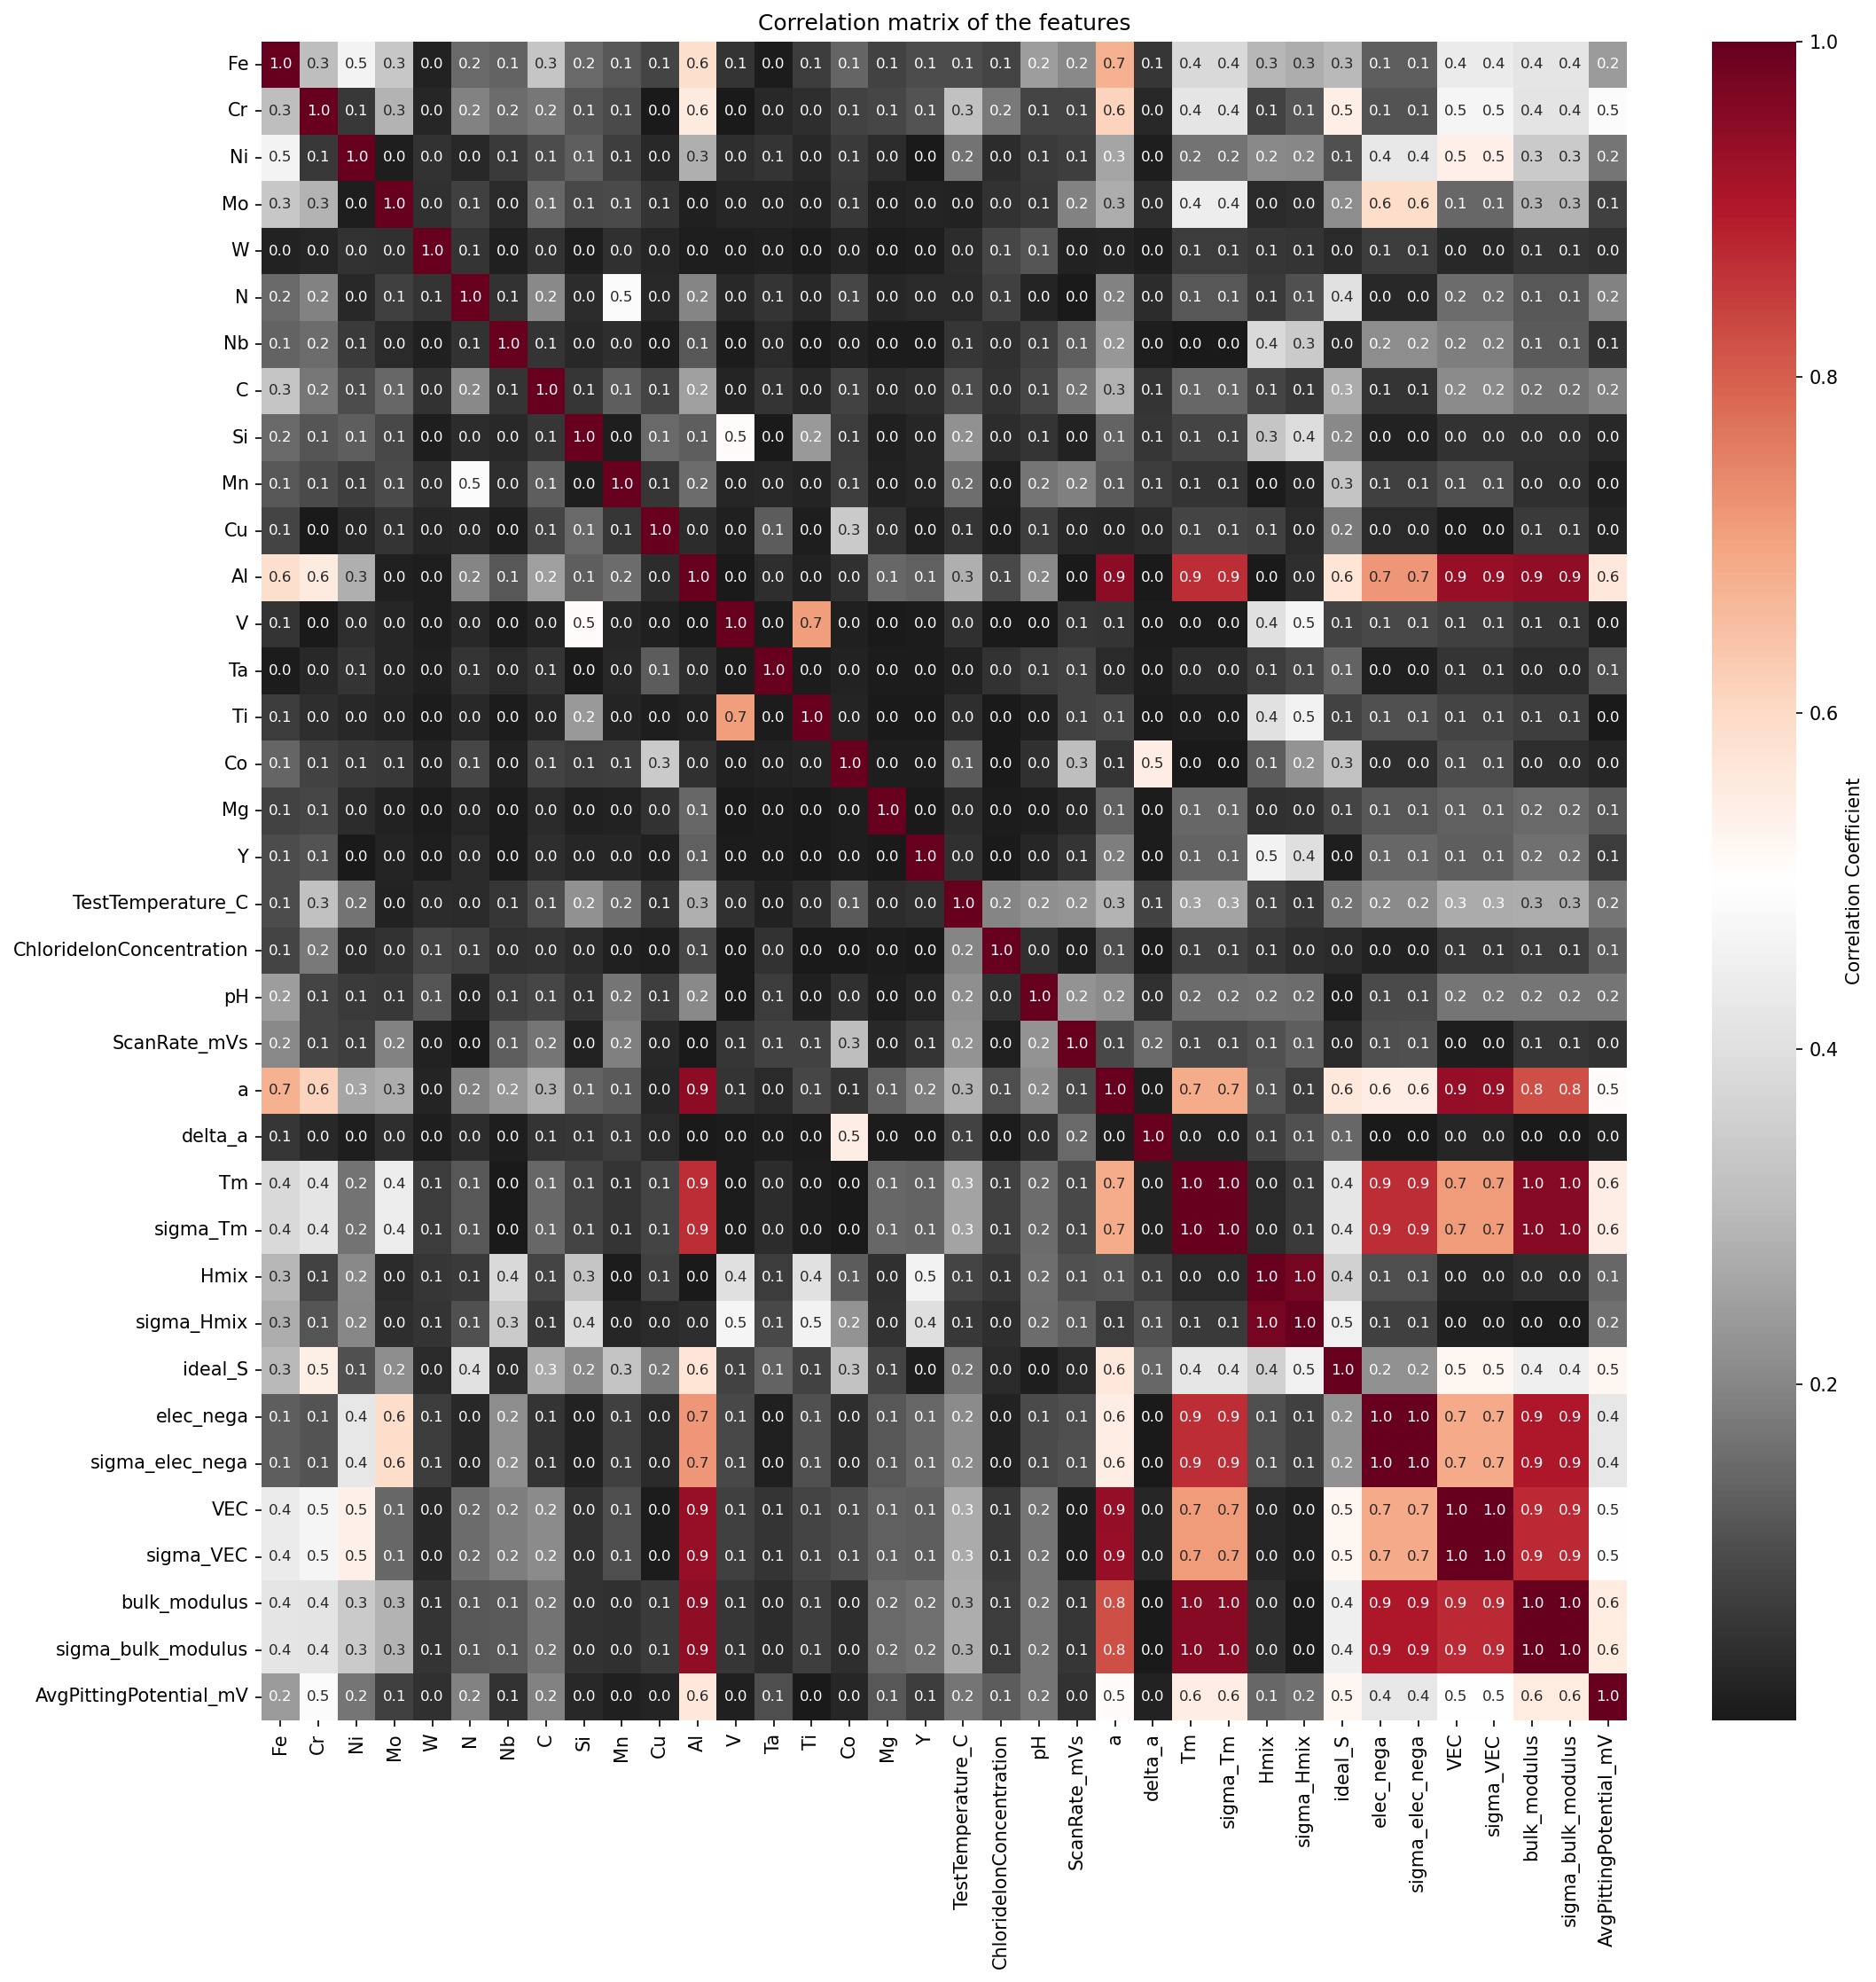

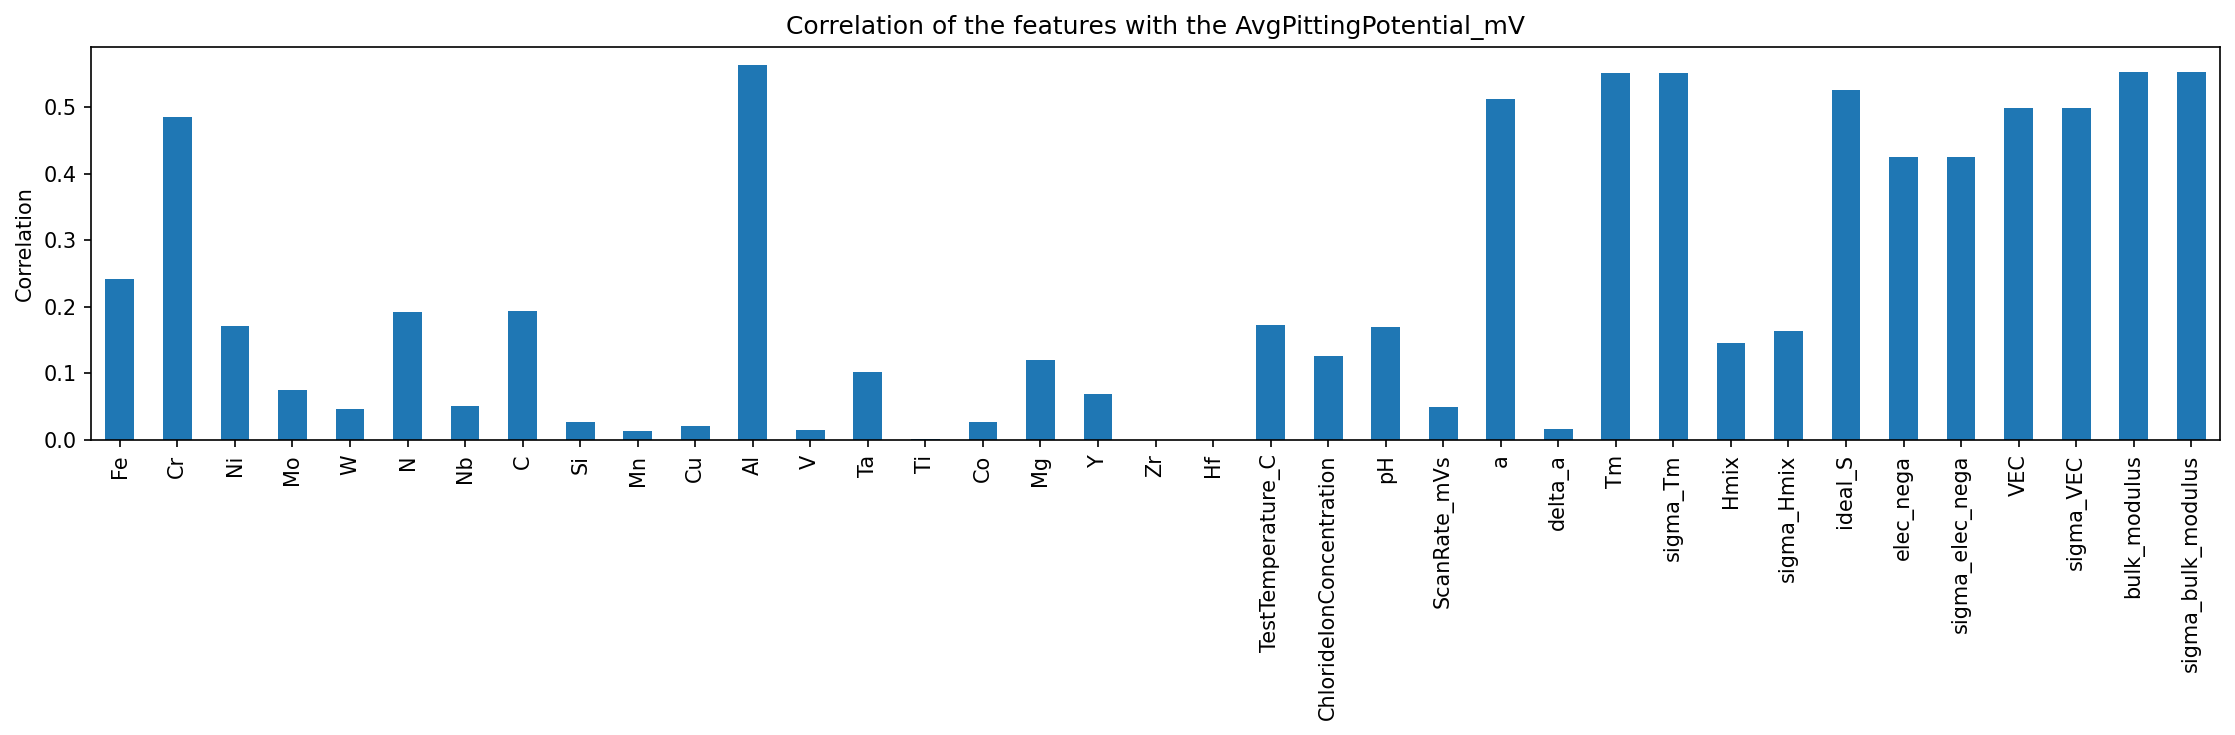

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# concatenate the below dataframes
df_C = pd.concat([df_C_compo, df_C_specific_testing,
                 df_C_specific_features, df_C_output], axis=1)

display(df_C.head(1))

# Plot 1 for the correlation heatmap
# Compute the correlation matrix
corr_matrix = df_C.corr().abs()

plt.figure(figsize=(15, 15), dpi=150)

# Drop columns where all values are NaN
corr_matrix = corr_matrix.loc[:, ~corr_matrix.isna().all(axis=0)]

# Drop rows where all values are NaN
corr_matrix = corr_matrix.loc[~corr_matrix.isna().all(axis=1), :]

sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='RdGy_r',
            cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={"size": 8})  # adjust size as needed
plt.title("Correlation matrix of the features")
plt.tight_layout()
plt.show()

# Plot 2 for the correlation of each feature with the target
plt.figure(figsize=(15, 5), dpi=150)
df_C.drop('AvgPittingPotential_mV', axis=1).apply(lambda x: x.corr(
    df_C['AvgPittingPotential_mV'])).abs().plot(kind='bar')
plt.title("Correlation of the features with the AvgPittingPotential_mV")
plt.ylabel("Correlation")
# make x-axis 45 degree angle
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Now we will do a bit more on feature selection


In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# prepare inputs and outputs for NN
dfs = [df_H_compo, df_H_specific_features, df_H_output,
       df_C_compo, df_C_specific_testing, df_C_specific_features, df_C_output]

# convert to numpy arrays
inputs_outputs = [np.asarray(df.values) for df in dfs]

# assign variables
X1, Y1, H1, X2, Z2, W2, C2 = inputs_outputs

# display(X1.shape, Y1.shape, H1.shape, X2.shape, Z2.shape, W2.shape, C2.shape)

# create the scalers
scalers = {
    "compo": MinMaxScaler(),  # for input compo
    "H_specific_features": MinMaxScaler(),  # for input H specific
    "H_output": MinMaxScaler(),  # for H outputs
    "C_specific_testing": MinMaxScaler(),  # for input C specific
    "C_specific_features": MinMaxScaler(),  # for input C specific
    "C_output": MinMaxScaler()  # for C outputs
}

# fit the scalers
scalers["compo"].fit(np.concatenate((X1, X2)))
scalers["H_specific_features"].fit(Y1)
scalers["H_output"].fit(H1.reshape((-1, 1)))
scalers["C_specific_testing"].fit(Z2)
scalers["C_specific_features"].fit(W2)
scalers["C_output"].fit(C2.reshape((-1, 1)))


# print the min and max values of X1 and X2
print("X1 min:", np.min(X1), "X1 max:", np.max(X1))

# Transform the inputs and outputs
X1_norm = scalers["compo"].transform(X1)
Y1_norm = scalers["H_specific_features"].transform(Y1)
H1_norm = scalers["H_output"].transform(H1.reshape((-1, 1)))
X2_norm = scalers["compo"].transform(X2)
Z2_norm = scalers["C_specific_testing"].transform(Z2)
W2_norm = scalers["C_specific_features"].transform(W2)
C2_norm = scalers["C_output"].transform(C2.reshape((-1, 1)))

# Concatenate X1, Y1 and X2, Z2, W2 for model training
X_H_norm = np.concatenate((X1_norm, Y1_norm), axis=1)
X_C_norm = np.concatenate((X2_norm, Z2_norm, W2_norm), axis=1)

X1 min: 0.0 X1 max: 85.39999999999999


In [22]:
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense

# print("X_H_norm min:", np.min(X_H_norm), "X_H_norm max:", np.max(X_H_norm))

# Define a function to evaluate feature importance


def evaluate_feature_importance(model, X, y):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    return result.importances_mean, result.importances_std


# Define a function to select features
def select_features(model, X, y):
    fs = SelectFromModel(model, threshold=0.05)
    fs.fit(X, y)
    return fs.transform(X)


# Create a Random Forest model
forestmodel_H = RandomForestRegressor(random_state=0)
forestmodel_H.fit(X_H_norm, H1_norm.ravel())

forestmodel_C = RandomForestRegressor(random_state=0)
forestmodel_C.fit(X_C_norm, C2_norm.ravel())

# print(H1_norm.shape, C2_norm.shape)

# Evaluate the fitting of the model
print("R2 score for H:", forestmodel_H.score(X_H_norm, H1_norm))
print("R2 score for C:", forestmodel_C.score(X_C_norm, C2_norm))

# Calculate feature importances and their standard deviations
importances_H, std_H = evaluate_feature_importance(
    forestmodel_H, X_H_norm, H1_norm.ravel())
importances_C, std_C = evaluate_feature_importance(
    forestmodel_C, X_C_norm, C2_norm.ravel())


feature_names_H = df_H_compo.columns.append(
    df_H_specific_features.columns).tolist()
feature_names_C = df_C_compo.columns.append(
    df_C_specific_testing.columns).append(df_C_specific_features.columns).tolist()

# now create a dataframe of feature importance and std with the column names of feature names
# Create a dataframe for H
df_feature_importance_H = pd.DataFrame({
    'feature': feature_names_H,
    'importance': importances_H,
    'std': std_H
})

# Create a dataframe for C
df_feature_importance_C = pd.DataFrame({
    'feature': feature_names_C,
    'importance': importances_C,
    'std': std_C
})

# create a new dataframe with the feature column of df_feature_importance_C
df_feature_only = pd.DataFrame(df_feature_importance_C['feature'])


display(df_feature_importance_H)
display(df_feature_importance_C)

# # Plotting for H
# plt.figure(figsize=(10, 8))
# plt.barh(feature_names_H, importances_H, xerr=std_H, align='center')
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.title('Feature Importance for H')
# plt.show()

# # Plotting for C
# plt.figure(figsize=(10, 8))
# plt.barh(feature_names_C, importances_C, xerr=std_C, align='center')
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.title('Feature Importance for C')
# plt.show()

R2 score for H: 0.8882089703293641
R2 score for C: 0.953064221943867


,feature,importance,std
0,Fe,0.013579,0.001163
1,Cr,0.014578,0.001407
2,Ni,0.009966,0.001156
3,Mo,0.013478,0.001211
4,W,0.001256,0.000127
5,N,0.000000,0.000000
6,Nb,0.006654,0.000868
7,C,0.000197,0.000007
8,Si,0.002218,0.000400
9,Mn,0.069334,0.007194


,feature,importance,std
0,Fe,1.988015e-02,1.669952e-03
1,Cr,4.320135e-02,2.445549e-03
2,Ni,6.022325e-03,5.118971e-04
3,Mo,5.907054e-02,6.020525e-03
4,W,1.891596e-03,2.122719e-04
5,N,1.399471e-02,9.410477e-04
6,Nb,1.759181e-03,1.297628e-04
7,C,9.630348e-03,9.806224e-04
8,Si,7.728009e-02,8.039540e-03
9,Mn,1.078614e-02,7.121760e-04


,index,feature,importance,std
0,0,Fe,1.988015e-02,1.669952e-03
1,1,Cr,4.320135e-02,2.445549e-03
2,2,Ni,6.022325e-03,5.118971e-04
3,3,Mo,5.907054e-02,6.020525e-03
4,4,W,1.891596e-03,2.122719e-04
5,5,N,1.399471e-02,9.410477e-04
6,6,Nb,1.759181e-03,1.297628e-04
7,7,C,9.630348e-03,9.806224e-04
8,8,Si,7.728009e-02,8.039540e-03
9,9,Mn,1.078614e-02,7.121760e-04


In [24]:
# display(df_feature_only)

# now concatenate the two dataframes: df_feature_only and df_feature_importance_H
df_feature_importance_H_full = pd.concat(
    [df_feature_only, df_feature_importance_H], axis=0)

display(df_feature_importance_H_full)

,feature
0,Fe
1,Cr
2,Ni
3,Mo
4,W
5,N
6,Nb
7,C
8,Si
9,Mn


,feature,importance,std
0,Fe,NaN,NaN
1,Cr,NaN,NaN
2,Ni,NaN,NaN
3,Mo,NaN,NaN
4,W,NaN,NaN
...,...,...,...
28,sigma_elec_nega,0.015261,0.001501
29,VEC,0.121658,0.007893
30,sigma_VEC,0.087933,0.006737
31,bulk_modulus,0.004897,0.000535


In [19]:
# Convert to numpy arrays
feature_names_H_np = np.array(feature_names_C)
importances_C_np = np.array(importances_C)

# Get selected feature names and importances
sel_indices = [feature_names_C.index(feature) for feature in feature_names_H]
feature_names_C_sel = feature_names_C_np[sel_indices]
importances_C_sel = importances_C_np[sel_indices]

print(importances_C_sel)

# Define bar width
bar_width = 0.35
index = np.arange(len(feature_names_H))

fig, ax = plt.subplots(figsize=(10, 8))
bar1 = ax.bar(index - bar_width / 2, importances_H, bar_width, label='H')
bar2 = ax.bar(index + bar_width / 2, importances_C_sel, bar_width, label='C')

ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importance for H and C')
ax.set_xticks(index)
ax.set_xticklabels(feature_names_H, rotation=90)
ax.legend()

fig.tight_layout()
plt.show()

NameError: name 'feature_names_C_np' is not defined

In [ ]:
# Step 1: Identify features with high correlation to the target
target_corr = df_C.drop('AvgPittingPotential_mV', axis=1).apply(
    lambda x: x.corr(df_C['AvgPittingPotential_mV'])).abs()
high_corr_features = target_corr[target_corr > 0.5].index.tolist()
# make sure the feature is in df_C_specific_features
high_corr_features = [
    feature for feature in high_corr_features if feature in df_C_specific_features.columns.tolist()]


# Step 2: Check for multicollinearity
corr_matrix_high_corr_features = corr_matrix.loc[high_corr_features,
                                                 high_corr_features]

# Print correlations greater than 0.8, excluding self-correlations (which are always 1)
multicollinearity_pairs = corr_matrix_high_corr_features[
    corr_matrix_high_corr_features < 1][corr_matrix_high_corr_features > 0.8]

print(multicollinearity_pairs.dropna(
    how='all', axis=1).dropna(how='all', axis=0))


# You can now manually inspect the output to decide which of the highly correlated features to retain